In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/generationai/interns_group1_2022/main/iris-data2.csv") 
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.groupby(['class']).size()

class
Iris-setosa        49
Iris-setossa        1
Iris-versicolor    45
Iris-virginica     50
versicolor          5
dtype: int64

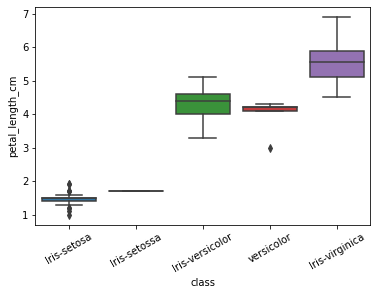

In [4]:
ax = sns.boxplot(x="class", y="petal_length_cm", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

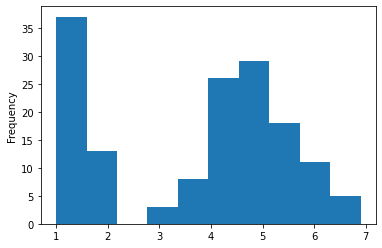

In [5]:
df['petal_length_cm'].plot.hist();

In [6]:
df['is_long'] = np.nan

In [7]:
cutoff = 2.5
df.loc[df['petal_length_cm']>cutoff, 'is_long'] = 1
df.loc[df['petal_length_cm']<=cutoff, 'is_long'] = 0

df = df.drop(['petal_length_cm'], axis=1)
df.head()

,sepal_length_cm,sepal_width_cm,petal_width_cm,class,is_long
0,5.1,3.5,0.2,Iris-setosa,0.0
1,4.9,3.0,0.2,Iris-setosa,0.0
2,4.7,3.2,0.2,Iris-setosa,0.0
3,4.6,3.1,0.2,Iris-setosa,0.0
4,5.0,3.6,0.2,Iris-setosa,0.0


## Missingness

In [8]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_width_cm     4
class              0
is_long            0
dtype: int64

In [9]:
df = df.dropna()

## Outliers

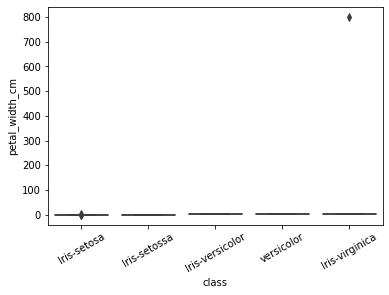

In [10]:
ax = sns.boxplot(x="class", y="petal_width_cm", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

In [11]:
## Finding outliers 
df.describe()

,sepal_length_cm,sepal_width_cm,petal_width_cm,is_long
count,146.000000,146.000000,146.000000,146.000000
mean,5.665027,3.046575,6.695205,0.684932
std,1.323494,0.433616,66.111505,0.466142
min,0.055000,2.000000,0.000000,0.000000
25%,5.100000,2.800000,0.325000,0.000000
50%,5.800000,3.000000,1.300000,1.000000
75%,6.400000,3.300000,1.800000,1.000000
max,7.900000,4.400000,800.000000,1.000000


In [12]:
# Position of the Outlier
df[df['petal_width_cm']>20]

,sepal_length_cm,sepal_width_cm,petal_width_cm,class,is_long
103,6.3,2.9,800.0,Iris-virginica,1.0


In [13]:
# Position of the Outlier
df[df['petal_width_cm']==0]

,sepal_length_cm,sepal_width_cm,petal_width_cm,class,is_long
9,4.9,3.1,0.0,Iris-setosa,0.0


In [14]:
df.drop(df.loc[df['petal_width_cm']==0].index, inplace=True)
df.drop(df.loc[df['petal_width_cm']==800].index, inplace=True)


In [15]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_width_cm,is_long
count,144.000000,144.000000,144.000000,144.00000
mean,5.665931,3.047222,1.232639,0.68750
std,1.330121,0.436442,0.756217,0.46513
min,0.055000,2.000000,0.100000,0.00000
25%,5.100000,2.800000,0.375000,0.00000
50%,5.800000,3.000000,1.300000,1.00000
75%,6.400000,3.300000,1.800000,1.00000
max,7.900000,4.400000,2.500000,1.00000


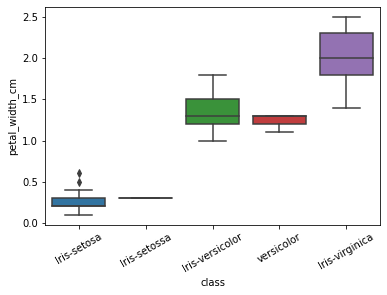

In [16]:
ax = sns.boxplot(x="class", y="petal_width_cm", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

## One hot encoding

In [17]:
# Get one hot encoding of columns B
onehots = pd.get_dummies(df['class'])
onehots.head()

,Iris-setosa,Iris-setossa,Iris-versicolor,Iris-virginica,versicolor
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [18]:
# Join the encoded df
df_pred = df.loc[:,['sepal_length_cm', 'sepal_width_cm',
                    'is_long','petal_width_cm']].join(onehots['Iris-virginica'])
df_pred.head()

,sepal_length_cm,sepal_width_cm,is_long,petal_width_cm,Iris-virginica
0,5.1,3.5,0.0,0.2,0
1,4.9,3.0,0.0,0.2,0
2,4.7,3.2,0.0,0.2,0
3,4.6,3.1,0.0,0.2,0
4,5.0,3.6,0.0,0.2,0


In [19]:
df_pred.groupby(by = "Iris-virginica").size()

Iris-virginica
0    95
1    49
dtype: int64

In [20]:
y = df_pred['Iris-virginica']
X = df_pred.drop(['Iris-virginica'],axis = 1)
X.head()

,sepal_length_cm,sepal_width_cm,is_long,petal_width_cm
0,5.1,3.5,0.0,0.2
1,4.9,3.0,0.0,0.2
2,4.7,3.2,0.0,0.2
3,4.6,3.1,0.0,0.2
4,5.0,3.6,0.0,0.2


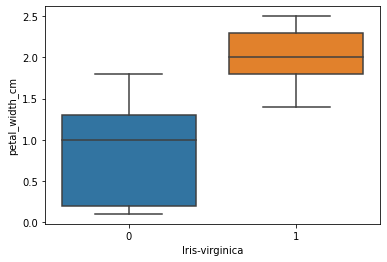

In [21]:
sns.boxplot(y="petal_width_cm", 
            x="Iris-virginica", data=df_pred);

## Logistic Regression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
LR = LogisticRegression(random_state=1)

In [24]:
LR.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [25]:
y_pred = LR.predict(X_test)

In [26]:
results = pd.DataFrame({"actual":y_test,
              "predicted": y_pred})

results

,actual,predicted
36,0,0
13,0,0
143,1,1
47,0,0
94,0,0
98,0,0
93,0,0
127,1,1
63,0,0
134,1,0


In [27]:
accuracy_score(results.actual, results.predicted)

0.9655172413793104

In [28]:
from sklearn.metrics import confusion_matrix

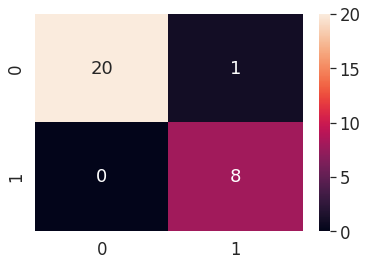

In [29]:
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g');

In [30]:
LR.feature_names = list(X_train.columns.values)


In [31]:
[j + " " + str(i) for i, j in zip(LR.coef_[0], LR.feature_names)]

['sepal_length_cm 0.7945605401828675',
 'sepal_width_cm -0.4770228888989705',
 'is_long 0.07528357093346405',
 'petal_width_cm 3.6428593690345']

# Now, what if you wanted to predict whether a flower was `Iris-setosa`?

In [32]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_width_cm,class,is_long
0,5.1,3.5,0.2,Iris-setosa,0.0
1,4.9,3.0,0.2,Iris-setosa,0.0
2,4.7,3.2,0.2,Iris-setosa,0.0
3,4.6,3.1,0.2,Iris-setosa,0.0
4,5.0,3.6,0.2,Iris-setosa,0.0


In [33]:
# Join the encoded df
df_pred2 = df.loc[:,['sepal_length_cm', 'sepal_width_cm',
                    'is_long','petal_width_cm']].join(onehots['Iris-setosa'])
df_pred2.head()

,sepal_length_cm,sepal_width_cm,is_long,petal_width_cm,Iris-setosa
0,5.1,3.5,0.0,0.2,1
1,4.9,3.0,0.0,0.2,1
2,4.7,3.2,0.0,0.2,1
3,4.6,3.1,0.0,0.2,1
4,5.0,3.6,0.0,0.2,1


In [34]:
y = df_pred2['Iris-setosa']
X = df_pred2.drop(['Iris-setosa'],axis = 1)
X.head()

,sepal_length_cm,sepal_width_cm,is_long,petal_width_cm
0,5.1,3.5,0.0,0.2
1,4.9,3.0,0.0,0.2
2,4.7,3.2,0.0,0.2
3,4.6,3.1,0.0,0.2
4,5.0,3.6,0.0,0.2


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
LR2 = LogisticRegression(random_state=1)

In [37]:
LR.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [38]:
y_pred = LR.predict(X_test)

In [39]:
accuracy_score(results.actual, results.predicted)

0.9655172413793104

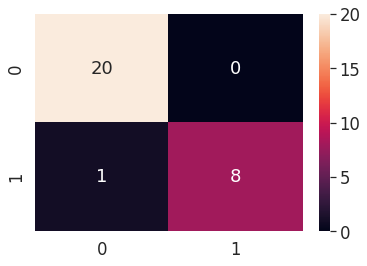

In [40]:
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g');